Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
import glob

In [5]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Train")
#data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
#image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
#print(image_count_test)

2239


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180
class_names =['actinic keratosis', 'basal cell carcinoma', 
              'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 
 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds  = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                                        labels='inferred', 
                                                                        label_mode='categorical', 
                                                                        class_names=class_names, 
                                                                        color_mode='rgb', 
                                                                        batch_size=batch_size, 
                                                                        image_size=(img_height, img_width), 
                                                                        shuffle=True, 
                                                                        seed=123, 
                                                                        validation_split=0.2, 
                                                                        subset='training', 
                                                                        )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                                        labels='inferred', 
                                                                        label_mode='categorical', 
                                                                        class_names=class_names, 
                                                                        color_mode='rgb', 
                                                                        batch_size=batch_size, 
                                                                        image_size=(img_height, img_width), 
                                                                        shuffle=True, 
                                                                        seed=123, 
                                                                        validation_split=0.2, 
                                                                        subset='validation'
                                                                        )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [12]:
# Creating a Dataframe with path file to each image with lables
orginal_path = [x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
output_name = [os.path.basename(os.path.dirname(y)) for y in orginal_path]
dataframe_dict_old = dict(zip(orginal_path, output_name))
original_df = pd.DataFrame(list(dataframe_dict_old.items()),columns = ['Path','Label'])
original_df[:5]

,Path,Label
0,/content/gdrive/MyDrive/Colab Notebooks/Train/...,seborrheic keratosis
1,/content/gdrive/MyDrive/Colab Notebooks/Train/...,seborrheic keratosis
2,/content/gdrive/MyDrive/Colab Notebooks/Train/...,seborrheic keratosis
3,/content/gdrive/MyDrive/Colab Notebooks/Train/...,seborrheic keratosis
4,/content/gdrive/MyDrive/Colab Notebooks/Train/...,seborrheic keratosis


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

/content/gdrive/MyDrive/Colab Notebooks/Train/actinic keratosis/ISIC_0027536.jpg
/content/gdrive/MyDrive/Colab Notebooks/Train/basal cell carcinoma/ISIC_0025260.jpg


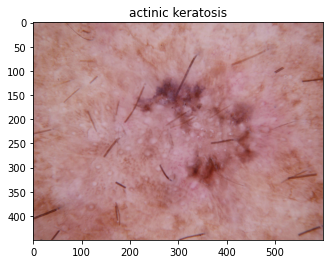

/content/gdrive/MyDrive/Colab Notebooks/Train/dermatofibroma/ISIC_0027876.jpg


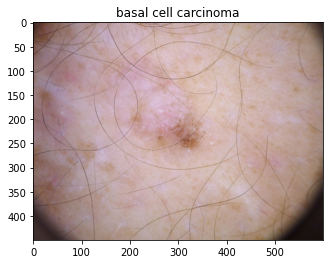

/content/gdrive/MyDrive/Colab Notebooks/Train/melanoma/ISIC_0000298.jpg


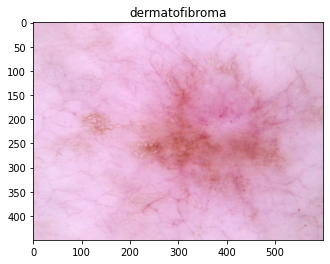

/content/gdrive/MyDrive/Colab Notebooks/Train/nevus/ISIC_0000034.jpg


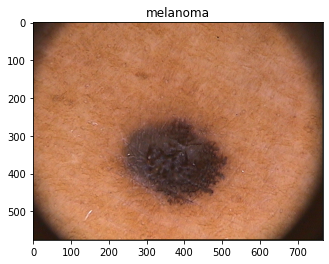

/content/gdrive/MyDrive/Colab Notebooks/Train/pigmented benign keratosis/ISIC_0025040.jpg


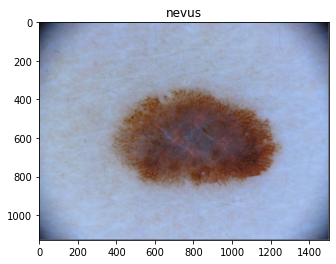

/content/gdrive/MyDrive/Colab Notebooks/Train/seborrheic keratosis/ISIC_0001077.jpg


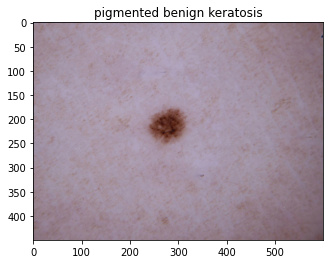

/content/gdrive/MyDrive/Colab Notebooks/Train/squamous cell carcinoma/ISIC_0025790.jpg


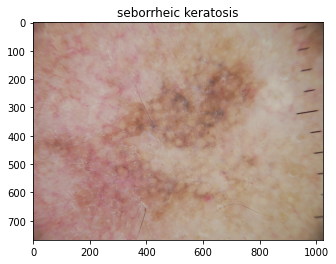

/content/gdrive/MyDrive/Colab Notebooks/Train/vascular lesion/ISIC_0029877.jpg


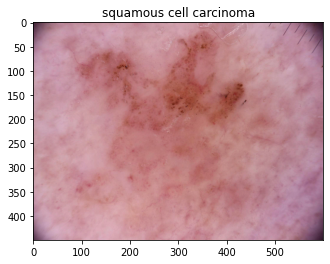

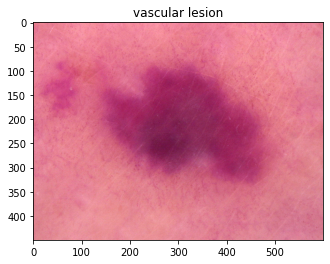

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import randint

%matplotlib inline

for p in class_names:
    pat = (original_df[original_df['Label'] == p]['Path'].iloc[randint(0,50)])

    for i in range(1):
        PATH = pat
        N = "%02d" % i
        print(PATH.replace("01", N))
        image = mpimg.imread(PATH) # images are color images
        plt.show()
        plt.title(p)
        plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
model = Sequential()
model.add(Rescaling(1/255, 0.0))
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (180,180,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Dense(9, activation = 'softmax'))



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ["accuracy"])

In [14]:
# View the summary of all layers
# model.summary()

### Train the model

In [15]:
epochs = 20
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=epochs, 
                    batch_size = batch_size
                   )

Epoch 1/20
56/56 [==============================] - 289s 1s/step - loss: 2.6041 - accuracy: 0.2734 - val_loss: 1.6383 - val_accuracy: 0.4049
Epoch 2/20
56/56 [==============================] - 2s 40ms/step - loss: 1.6209 - accuracy: 0.4364 - val_loss: 1.5779 - val_accuracy: 0.4564
Epoch 3/20
56/56 [==============================] - 2s 40ms/step - loss: 1.4822 - accuracy: 0.4794 - val_loss: 1.5983 - val_accuracy: 0.4519
Epoch 4/20
56/56 [==============================] - 2s 40ms/step - loss: 1.3921 - accuracy: 0.5195 - val_loss: 1.4387 - val_accuracy: 0.5235
Epoch 5/20
56/56 [==============================] - 2s 40ms/step - loss: 1.2687 - accuracy: 0.5575 - val_loss: 1.3907 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 2s 40ms/step - loss: 1.1734 - accuracy: 0.5876 - val_loss: 1.5128 - val_accuracy: 0.5056
Epoch 7/20
56/56 [==============================] - 2s 40ms/step - loss: 1.1291 - accuracy: 0.5949 - val_loss: 1.6132 - val_accuracy: 0.4609
Epoch 8/20
56

### Visualizing training results

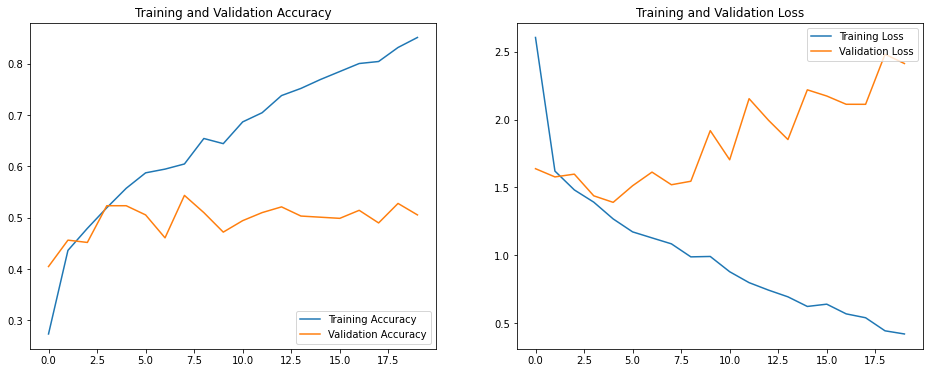

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here

#### Findings <br>

- The validation accuracy peaks out at about 50% accuracy, while the traning accuracy continues to rise.

- The validation loss starts to rise after just a few epochs of traning, while the traning loss continues to go down

- This is a clear indication of overfitting since the training score is increasing while the validation is not

- Expiremented with various parameters such as larger number of neurons, dreacising the filter size, and increasing the number of epochs. The results were the same

### Second model
#### Adding Augment layer

In [15]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomHeight, RandomRotation, RandomZoom, RandomWidth

# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = Sequential([RandomFlip(mode ='horizontal_and_vertical'), 
                               RandomHeight(factor = (0.2,0.3)), 
                               RandomRotation(factor=(-0.2, 0.2)), 
                               RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3)), 
                               RandomWidth(0.2)] 
                              )

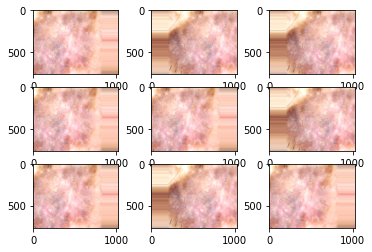

In [16]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img(original_df['Path'].iloc[1])
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

### Todo:
### Create the model, compile and train the model
#### Dropout layer added to the model

In [19]:
### Your code goes here
model = Sequential()
data_augmentation
model.add(Rescaling(1/255, 0.0))
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (180,180,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(Dense(9, activation = 'softmax'))

### Compiling the model

In [20]:
### Todo, choose an appropirate optimiser and loss function
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ["accuracy"])

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs = 30
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=epochs, 
                    batch_size = batch_size
                   )

Epoch 1/30
56/56 [==============================] - 3s 47ms/step - loss: 6.3855 - accuracy: 0.1953 - val_loss: 2.1046 - val_accuracy: 0.1924
Epoch 2/30
56/56 [==============================] - 3s 45ms/step - loss: 2.0501 - accuracy: 0.1864 - val_loss: 2.0510 - val_accuracy: 0.1924
Epoch 3/30
56/56 [==============================] - 2s 44ms/step - loss: 2.0341 - accuracy: 0.2009 - val_loss: 2.0231 - val_accuracy: 0.1946
Epoch 4/30
56/56 [==============================] - 2s 44ms/step - loss: 2.0241 - accuracy: 0.2065 - val_loss: 2.0178 - val_accuracy: 0.2058
Epoch 5/30
56/56 [==============================] - 2s 44ms/step - loss: 2.0318 - accuracy: 0.2076 - val_loss: 2.0366 - val_accuracy: 0.2058
Epoch 6/30
56/56 [==============================] - 2s 44ms/step - loss: 2.0211 - accuracy: 0.2148 - val_loss: 2.0037 - val_accuracy: 0.2215
Epoch 7/30
56/56 [==============================] - 2s 44ms/step - loss: 1.9664 - accuracy: 0.2400 - val_loss: 1.9407 - val_accuracy: 0.2864
Epoch 8/30
56

### Visualizing the results

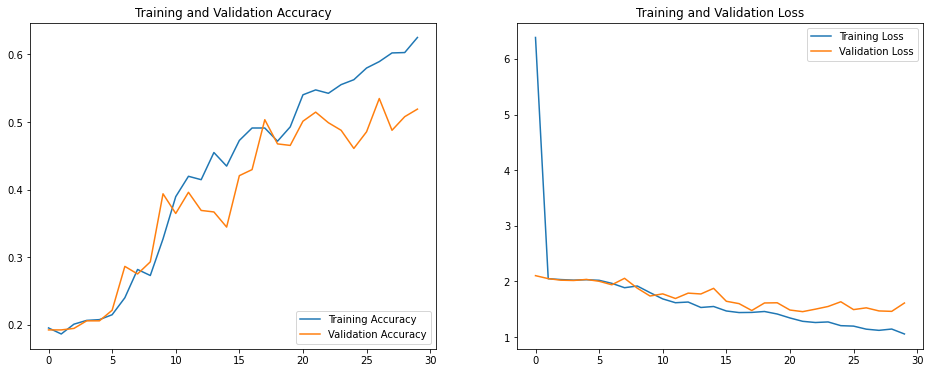

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run? <br>

- There is a slight improvement to the model
- The difference is, in the first model, the validation loss started to increase after a cerrtain number of epochs, However , after adding dropouts and augmenting images, the validation loss did not start to increase, but stsabilized around some point.
- However, there is not much improvement with the accuracy score
- Overfitting is still evident since traning saccuracy is increasing while validation is not


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


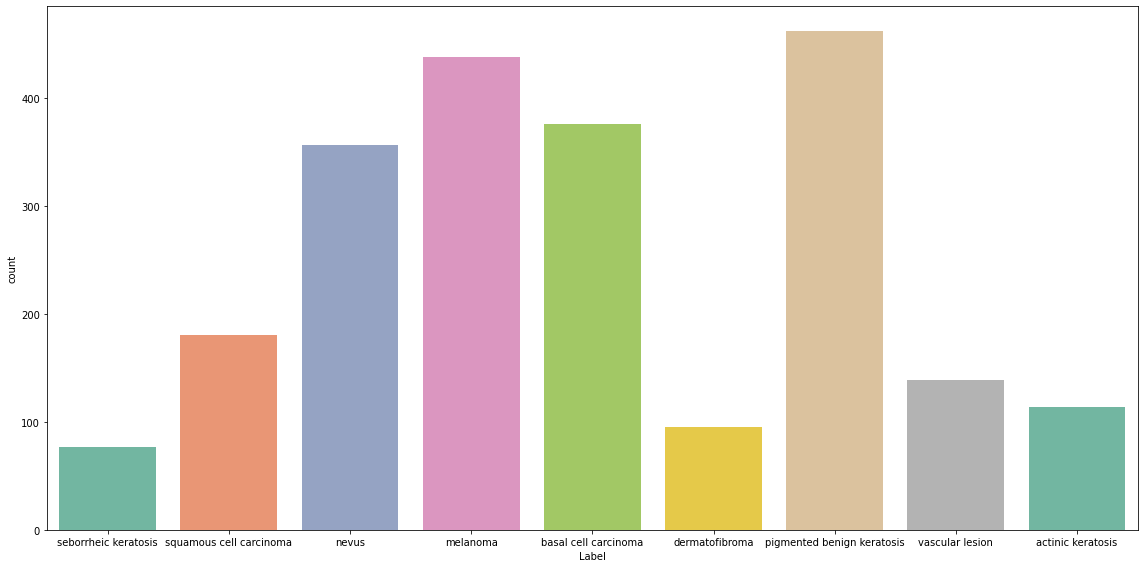

In [24]:
# Before augmentation
plt.figure(figsize=(16, 8))
plt.tight_layout()

sns.countplot(original_df['Label'], palette=("Set2"))
plt.tight_layout()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
Seborrheic Keratosis has the least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
Pigmented Benign Keratosis, melanoma, nevus, basal cell carcinoma  

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
path_to_training_dataset="/content/gdrive/MyDrive/Colab Notebooks/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB8DC0CA650>: 100%|██████████| 500/500 [00:19<00:00, 26.09 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB92A0CF550>:   0%|          | 1/500 [00:00<00:53,  9.30 Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB92A0CB850>: 100%|██████████| 500/500 [00:18<00:00, 26.48 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB8DC0E7750>:   0%|          | 1/500 [00:00<01:18,  6.36 Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB8DC0C6810>: 100%|██████████| 500/500 [00:19<00:00, 25.09 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB8DC0CCC50>: 100%|██████████| 500/500 [01:25<00:00,  5.87 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB9809CF910>: 100%|██████████| 500/500 [01:15<00:00,  6.61 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB92A0CF0D0>: 100%|██████████| 500/500 [00:19<00:00, 25.14 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB980AAF150>: 100%|██████████| 500/500 [00:40<00:00, 12.40 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB9D008A1D0>: 100%|██████████| 500/500 [00:19<00:00, 25.09 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB92A3025D0>: 100%|██████████| 500/500 [00:19<00:00, 25.78 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
new_df[:5]

,Path,Label
0,/content/gdrive/MyDrive/Colab Notebooks/Train/...,seborrheic keratosis
1,/content/gdrive/MyDrive/Colab Notebooks/Train/...,seborrheic keratosis
2,/content/gdrive/MyDrive/Colab Notebooks/Train/...,seborrheic keratosis
3,/content/gdrive/MyDrive/Colab Notebooks/Train/...,seborrheic keratosis
4,/content/gdrive/MyDrive/Colab Notebooks/Train/...,seborrheic keratosis


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


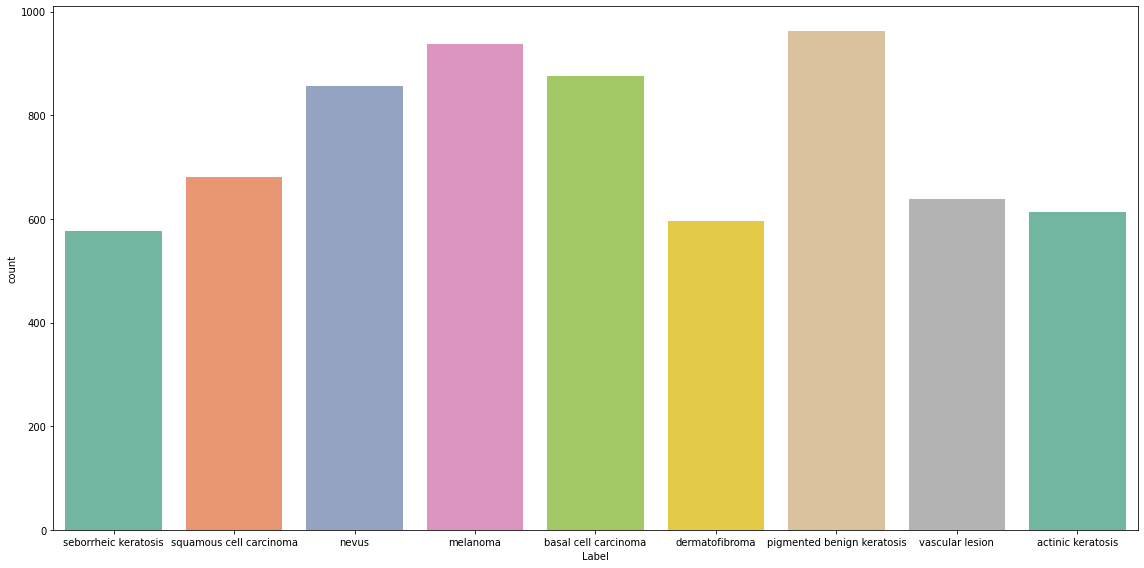

In [29]:
# After augmentation
plt.figure(figsize=(16, 8))
plt.tight_layout()

sns.countplot(new_df['Label'],palette=("Set2"))
plt.tight_layout()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [30]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [10]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds  = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                                        labels='inferred', 
                                                                        label_mode='categorical', 
                                                                        class_names=class_names, 
                                                                        color_mode='rgb', 
                                                                        batch_size=batch_size, 
                                                                        image_size=(img_height, img_width), 
                                                                        shuffle=True, 
                                                                        seed=123, 
                                                                        validation_split=0.2, 
                                                                        subset='training', 
                                                                        )

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                                        labels='inferred', 
                                                                        label_mode='categorical', 
                                                                        class_names=class_names, 
                                                                        color_mode='rgb', 
                                                                        batch_size=batch_size, 
                                                                        image_size=(img_height, img_width), 
                                                                        shuffle=True, 
                                                                        seed=123, 
                                                                        validation_split=0.2, 
                                                                        subset='validation'
                                                                        )

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Model
- Batch normalization 
- DropOut
- Max pooling
- Starting with 64 Filters and increasing to 128 and 256

In [36]:
### Your code goes here
model = Sequential()
#data_augmentation
model.add(Rescaling(1/255, 0.0))
model.add(Conv2D(64, (3,3), padding = 'same', input_shape = (180,180,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(Dense(9, activation = 'softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [37]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ["accuracy"])

#### **Todo:**  Train your model

In [38]:
epochs = 35
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=epochs, 
                    batch_size = batch_size
                   )

Epoch 1/50
169/169 [==============================] - 39s 221ms/step - loss: 103.4828 - accuracy: 0.3757 - val_loss: 16.8924 - val_accuracy: 0.2081
Epoch 2/50
169/169 [==============================] - 38s 218ms/step - loss: 4.5295 - accuracy: 0.5295 - val_loss: 6.7636 - val_accuracy: 0.1902
Epoch 3/50
169/169 [==============================] - 38s 218ms/step - loss: 2.2927 - accuracy: 0.5835 - val_loss: 4.5752 - val_accuracy: 0.2237
Epoch 4/50
169/169 [==============================] - 38s 219ms/step - loss: 1.7430 - accuracy: 0.6180 - val_loss: 1.9845 - val_accuracy: 0.4989
Epoch 5/50
169/169 [==============================] - 38s 218ms/step - loss: 1.2653 - accuracy: 0.6664 - val_loss: 1.6784 - val_accuracy: 0.5839
Epoch 6/50
169/169 [==============================] - 38s 218ms/step - loss: 0.9788 - accuracy: 0.7062 - val_loss: 1.0712 - val_accuracy: 0.6644
Epoch 7/50
169/169 [==============================] - 38s 218ms/step - loss: 0.8687 - accuracy: 0.7251 - val_loss: 1.0437 - val

#### **Todo:**  Visualize the model results

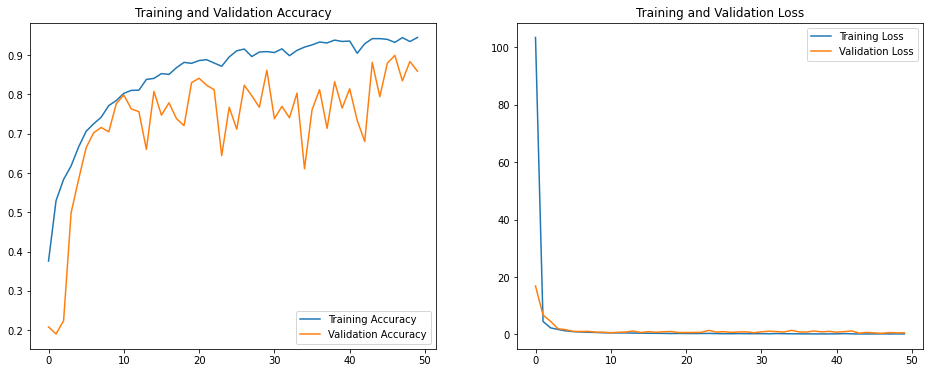

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Augmentation has improved the model significantly
- Accuracy is around 80%
- The number of epochs can be increased since the validation loss is not increasing. Will keep it at 50 epochs as per task 
- This model solves the problem of over fitting since the difference between traning accurazy and validation seems to be stable